In [1]:
import numpy as np
import copy
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
class Map():
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.wall_map = self.make_wall_map()
        
    def make_wall_map(self):
        w = self.get_walls()
        wall_map = np.zeros((self.x, self.y))
        for i in range(0, len(w)):
            wall_map[w[i][0]][w[i][1]] = 1
        return wall_map
    
    def get_walls(self):
        walls = []
        walls.append([3, 0])
        walls.append([3, 1])
        walls.append([3, 2])
        walls.append([3, 3])
        walls.append([3, 4])
        walls.append([3, 5])
        walls.append([4, 5])
        walls.append([5, 5])
        walls.append([6, 5])
        walls.append([7, 5])
        
        return walls

    def draw(self):
        for i in range(0, self.y):
            for j in range(0, self.x):
                if(self.wall_map[j][i]):
                    plt.fill([j, j+1, j+1, j], [i, i, i+1, i+1], color="gray", alpha=0.5)
                else:
                    plt.fill([j, j+1, j+1, j], [i, i, i+1, i+1], color="gray", alpha=0.01)

In [3]:
class Start():
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def draw(self):
        plt.fill([self.x, self.x+1, self.x+1, self.x], [self.y, self.y, self.y+1, self.y+1], color="lightblue", alpha=0.6)

In [4]:
class Goal():
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def draw(self):
        plt.fill([self.x, self.x+1, self.x+1, self.x], [self.y, self.y, self.y+1, self.y+1], color="red", alpha=0.5)

In [5]:
# 基準ノードクラス
class Node():
    def __init__(self, m, s, g):
        self.x = s.x
        self.y = s.y
        self.m = m
        self.s = s
        self.g = g
        
        self.isGoal = False
        self.cost = 0           # 実コスト
        
        self.score_map = np.zeros((self.m.x, self.m.y))
        self.cost_map = np.zeros((self.m.x, self.m.y))
        self.status_map = np.zeros((self.m.x, self.m.y))    # 0: none, 1: open, 2: closed
        self.path_map = np.zeros((self.m.x, self.m.y))
        
        self.open_node(self.x, self.y)
    
    def draw(self):
        for i in range(0, self.m.y):
            for j in range(0, self.m.x):
                if self.status_map[j][i] == 1:
                    plt.text(j+0.05, i+0.2, "open")
                if self.status_map[j][i] == 2:
                    plt.text(j+0.05, i+0.2, "closed")
                
                plt.text(j+0.05, i+0.4, self.score_map[j][i])
                plt.text(j+0.05, i+0.6, self.cost_map[j][i])
                
                
    def run_node(self):
        # 周囲のノードをオープンする
        self.open_around()
        
        # 基準ノードをクローズする
        self.set_status_closed(self.x, self.y)
        
    def open_node(self, x, y):
        # 状態をオープンにする
        self.set_status_open(x, y)
        # スコアを計算して記録
        self.write_score(x, y)
        # 実コストを記録
        self.write_cost(x, y)
        
    def set_status_open(self, x, y):
        self.status_map[x][y] = 1
        
    def set_status_closed(self, x, y):
        self.status_map[x][y] = 2
    
    # スコアをスコアマップに記録する関数
    def write_score(self, x, y):
        score = self.calc_score(x, y)
        self.score_map[x][y] = score
    
    # 実コストをスコアマップに記録する関数
    def write_cost(self, x, y):
        self.cost_map[x][y] = self.cost
    
    # スコアを計算する関数
    def calc_score(self, x, y):
        hcost = self.calc_hcost(x, y)
        score = self.cost + hcost
        return score
    
    # 推定コストを計算する関数
    def calc_hcost(self, x, y):
        # 基準ノードとゴール地点のx, y座標の差分を求めておく
        dx = abs(self.g.x - x)
        dy = abs(self.g.y - y)
        
        # 基準ノードとゴール地点のユークリッド距離を推定コストとする
        hcost = round(math.sqrt(math.pow(dx, 2) + math.pow(dy, 2)), 1)
        return hcost
    
    # 基準ノードの周囲8方向にあるノードをオープンする
    def open_around(self):
        around_status = self.get_around_status()
        
        for i in range(0, len(around_status)):
            if around_status[i] == 0:
                # 基準ノードの左下
                if i == 0:
                    self.add_cost_and_open_node(self.x-1, self.y+1, 1.4)
                    self.path_map[self.x-1, self.y+1] = 1
                    
                # 基準ノードの下
                if i == 1:
                    self.add_cost_and_open_node(self.x, self.y+1, 1)
                    self.path_map[self.x, self.y+1] = 2
                    
                # 基準ノードの右下
                if i == 2:
                    self.add_cost_and_open_node(self.x+1, self.y+1, 1.4)
                    self.path_map[self.x+1, self.y+1] = 3
                    
                # 基準ノードの右
                if i == 3:
                    self.add_cost_and_open_node(self.x+1, self.y, 1)
                    self.path_map[self.x+1, self.y] = 4
                
                # 基準ノードの右上
                if i == 4:
                    self.add_cost_and_open_node(self.x+1, self.y-1, 1.4)
                    self.path_map[self.x+1, self.y-1] = 5
                
                # 基準ノードの上
                if i == 5:
                    self.add_cost_and_open_node(self.x, self.y-1, 1)
                    self.path_map[self.x, self.y-1] = 6
                
                # 基準ノードの左上
                if i == 6:
                    self.add_cost_and_open_node(self.x-1, self.y-1, 1.4)
                    self.path_map[self.x-1, self.y-1] = 7
                
                # 基準ノードの左
                if i == 7:
                    self.add_cost_and_open_node(self.x-1, self.y, 1.4)
                    self.path_map[self.x-1, self.y] = 8
    
    def get_around_status(self):
        around_status = []
        # 基準ノードの周囲8方向にあるノードの状態を取得
        around_status.append(self.status_check(self.x-1, self.y+1))
        around_status.append(self.status_check(self.x, self.y+1))
        around_status.append(self.status_check(self.x+1, self.y+1))
        around_status.append(self.status_check(self.x+1, self.y))
        around_status.append(self.status_check(self.x+1, self.y-1))
        around_status.append(self.status_check(self.x, self.y-1))
        around_status.append(self.status_check(self.x-1, self.y-1))
        around_status.append(self.status_check(self.x-1, self.y))
        return around_status
        
    def status_check(self, x, y):
        if x >= 0 and x < self.m.x and y >= 0 and y < self.m.y \
        and not self.m.wall_map[x][y]:
            return self.status_map[x][y]
        else:
            return 2    # closed 扱いにしておく
    
    def add_cost_and_open_node(self, x, y, cost):
        self.cost += cost
        self.open_node(x, y)
        self.cost -= cost

In [6]:
# 描画するためのグラフを用意する関数
def set_field(x, y):
    plt.figure(figsize=(10,10),dpi=200)
    plt.axes().set_aspect('equal')
    plt.xlim(0, x)
    plt.ylim(y, 0)

In [7]:
def draw_playground(m, s, g):
    set_field(m.x, m.y)
    m.draw()    # Map の描画
    s.draw()    # Start 地点の描画
    g.draw()    # Goal 地点の描画

In [8]:
# 次の基準ノードを選択し, そのノードの座標をリストで返す関数
def select_node(n):
    
    min_score = 999
    min_cost = 999
    
    # 最小のスコアを求める
    for i in range(0, n.m.y):
        for j in range(0, n.m.x):
            if n.score_map[j][i] < min_score and not n.score_map[j][i] == 0 and n.status_map[j][i] == 1:
                min_score = n.score_map[j][i]
    
    # 最小のスコアかつ最小の実コストのノードを選択する
    for i in range(0, n.m.y):
        for j in range(0, n.m.x):
            if n.score_map[j][i] == min_score and n.cost_map[j][i] < min_cost \
            and not n.cost_map[j][i] == 0 and n.status_map[j][i] == 1:
                min_cost = n.cost_map[j][i]
                selected_node = [j, i]
                
    return selected_node

In [9]:
def node_get_data(n, x, y):
    n.x = x
    n.y = y
    n.cost = n.cost_map[x][y]

In [10]:
def update(n):
    if not n.isGoal:
        # 次の基準ノードの座標を取得
        next_xy = select_node(n)
        
        # 次の基準ノードがゴール地点だったら, isGoal を True にする
        if next_xy == [n.g.x, n.g.y]:
            n.isGoal = True
        
        node_get_data(n, next_xy[0], next_xy[1])
        n.run_node()

In [11]:
# 経路のリストを取得する関数
def get_path(n):
    path_list = []
    x = n.g.x
    y = n.g.y
    path_list.insert(0, [x, y])
    
    # ゴール地点からスタート地点まで戻りながら経路を取得する
    while not [x, y] == [n.s.x, n.s.y]:
        path = path_check(n, x, y)
        if path == 1: x += 1; y -= 1
        if path == 2: y -= 1
        if path == 3: x -= 1; y -= 1
        if path == 4: x -= 1
        if path == 5: x -= 1; y += 1
        if path == 6: y += 1
        if path == 7: x += 1; y += 1
        if path == 8: x += 1
        
        # 経路を逆走しているので, リストの最前に要素を追加
        path_list.insert(0, [x, y])
    
    return path_list

In [12]:
def path_check(n, x, y):
        if x >= 0 and x < n.m.x and y >= 0 and y < n.m.y \
        and not n.m.wall_map[x][y]:
            return n.path_map[x][y]

In [13]:
def draw_path(path_list):
    # スタート地点とゴール地点は描画しない
    for i in range(1, len(path_list)-1):
        plt.fill([path_list[i][0], path_list[i][0]+1, path_list[i][0]+1, path_list[i][0]], [path_list[i][1], path_list[i][1], path_list[i][1]+1, path_list[i][1]+1], color="green", alpha=0.1)

[[0, 1], [1, 2], [2, 3], [2, 4], [2, 5], [3, 6], [4, 6], [5, 6], [6, 6], [7, 6], [8, 5], [7, 4], [6, 3], [5, 2], [5, 1], [4, 0]]


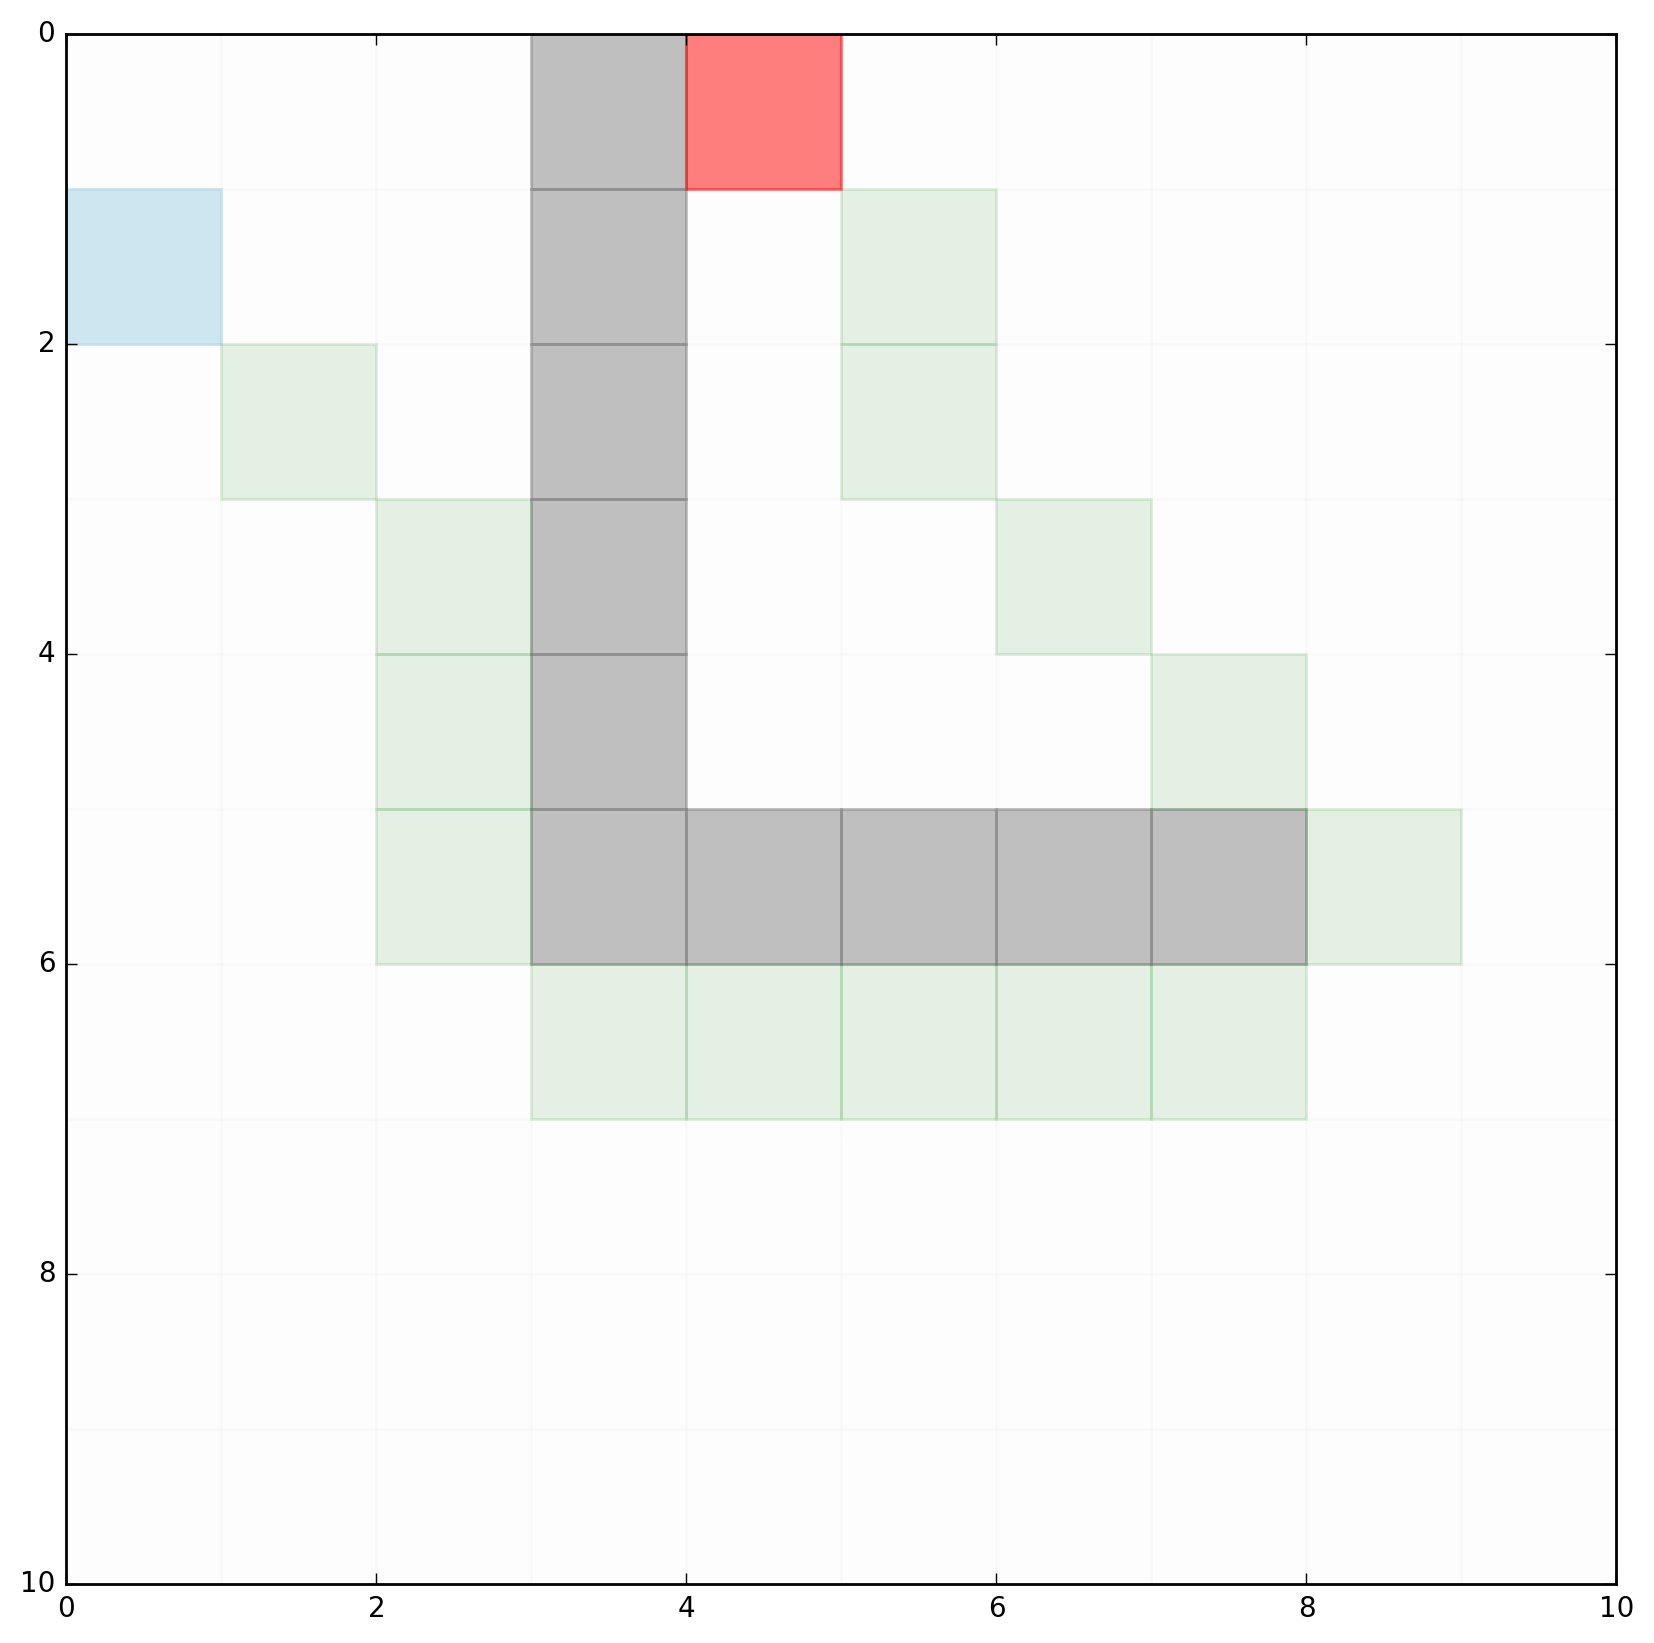

In [14]:
if __name__ == '__main__':
    # クラスの呼び出し
    m = Map(10, 10)    # 引数は地図のサイズ
    s = Start(0, 1)    # 引数はスタート地点の座標
    g = Goal(4, 0)     # 引数はゴール地点の座標
    n = Node(m, s, g)
    
    # 経路探索を行う場所の描画
    draw_playground(m, s, g)
    
    # 経路探索の実行
    n.run_node()
    while not n.isGoal:
        update(n)
    
    # 探索に用いた情報の描画, 地図サイズを10x10にしたほうが見やすい
    #n.draw()
    
    # 算出された経路がわかるリストを表示
    print(get_path(n))
    
    # 経路の描画
    draw_path(get_path(n))